# Julia-Notebook zur Veranschaulichung der Fenstermethode

## Initialisierung

In [1]:
using Interact, Plots, DSP, LaTeXStrings

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14258968599733994235\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14848465489846820599\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14258968599733994235\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Abgetastete, gefensterte und verschobene Impulsantwort eines idealen analogen Tiefpassfilters

Impulsantwort (mit $\mathrm{sinc}(x)=sin(\pi x)/(\pi x)$):
$$h[n]=\frac{\Omega_g}{\pi}\mathrm{sinc}\frac{\Omega_g\left(n-\frac{N}{2}\right)}{\pi}\cdot w[n]$$
mit normierter Grenzkreisfrequenz $\Omega_g=2 \pi f_g / f_s$ (Abtastfrequenz $f_s$), Filterordnung $N$ und Fensterfunktion $w[n]$.

Fensterfunktionen:
* **Rechteck**:
  $$w[n]=\begin{cases}1,& 0\leq n \leq N\\0,& \text{otherwise}\end{cases}$$
* **Hann** (auch fälschlicherweise als **Hanning** bezeichnet, mit *hanning* wurde, abgeleitet von *to hann*, im Ursprungspaper die Anwendung des Hann-Fensters bezeichnet): Raised-Cosine-Fenster mit Nullen an den Endpunkten
  $$w[n]=\begin{cases}\cos^2\left(\pi\left(\frac{n}{N}-0.5\right)\right),& 0\leq n \leq N\\0,& \text{otherwise}\end{cases}$$
* **Hamming**: keine Nullen an den Eckpunkten und kleinere Flankensteilheit gegenüber Hann-Fenster, aber entfernt erste Nebenkeule
  $$w[n]=\begin{cases}0.54+0.46\cos\left(2\pi\left(\frac{n}{N}-0.5\right)\right),& 0\leq n \leq N\\0,& \text{otherwise}\end{cases}$$
* **Tukey**: flacher Verlauf um die Mitte, gleich Null an den Endpunkten und sinusoidaler Übergang mit Parameter $a\in[0,1]$ dazwischen (Grenzfall $a=0$ entspricht Rechteckfenster, Grenzfall $a=1$ Hann-Fenster)
  $$w[n]=\begin{cases}\frac{1}{2}\left(1+\cos\left(\pi\frac{N\frac{1-a}{2}-n}{N\frac{1-a}{2}}\right)\right),& 0\leq n < N\frac{1-a}{2}\\
    1,& N\frac{1-a}{2} \leq n \leq N\frac{1+a}{2}\\
    \frac{1}{2}\left(1+\cos\left(\pi\frac{n-N\frac{1+a}{2}}{N\frac{1-a}{2}}\right)\right),& N\frac{1+a}{2} < n \leq N\\0,& \text{otherwise}\end{cases}$$
* **Bartlett**: Dreiecksverlauf mit Nullen an den Endpunkten
  $$w[n]=\begin{cases}1-\left|\frac{2n}{N}-1\right|,& 0\leq n \leq N\\0,& \text{otherwise}\end{cases}$$
* **Kaiser**: basiert auf einer Besselfunktion mit Parameter $a$, größere Werte von $a$ erhöhen die Sperrdämpfung, verbreitern allerdings auch die Hauptkeule, typischer Wert: $a=3$
* weitere, hier nicht betrachtete Fensterfunktionen: **Blackman**, **Gauss**, **Dreieck**, **Lanczos**, **Cosinus** 

In [2]:
h(n, Omega_g, N) = Omega_g/pi * sinc(Omega_g*(n-N/2)/pi);

In [3]:
@manipulate for N in 10:100, Omega_g in 0:.1:pi, a_kaiser in .5:.1:6, a_tukey in 0:.1:1,
        win_opt = Dict("Rechteck" => 1, "Hann" => 2, "Hamming" => 3, "Bartlett" => 4,
            "Tukey" => 5, "Kaiser" => 6)
    if win_opt == 1
        window = rect(N+1)
    elseif win_opt == 2
        window = hanning(N+1)
    elseif win_opt == 3
        window = hamming(N+1)
    elseif win_opt == 4
        window = bartlett(N+1)
    elseif win_opt == 5
        window = tukey(N+1,a_tukey)
    elseif win_opt == 6
        window = kaiser(N+1,a_kaiser)
    end
    n = 0:N;
    plot(n, window, label=false, lw=2, linecolor = :lightblue);
    plot!(n, window, label=L"w[n]", lw=3, seriestype = :scatter, markercolor = :blue)
    plot!(n,h.(n, Omega_g, N).*window, label = false, lw=2, linecolor = :lightgreen);
    plot!(n,h.(n, Omega_g, N).*window, label = L"h[n]", lw=3, seriestype = :scatter, markercolor = :green);
    ylims!((-.25,1.1));
    xlabel!(L"n");
  end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 10,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
55, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/guido/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/guido/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/guido/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/guido/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/guido/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fe3a345ee60, Task (runnable) @0x00007fe3a345ee60), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\"

## Resultierender Frequenzgang

Der Frequenzgang $H^\prime(f)$ ermittelt sich aus der Übertragungsfunktion $H(z)$ wie folgt:
$$H^\prime(f) = H\left(e^{j 2 \pi f / f_s}\right).$$ 

In [4]:
@manipulate for N in 10:100, f_g_norm in 0.1:.05:.5, a_kaiser in .5:.1:6, a_tukey in 0:.1:1,
        win_opt = Dict("Rechteck" => 1, "Hanning" => 2, "Hamming" => 3, "Bartlett" => 4,
            "Tukey" => 5, "Kaiser" => 6)
    if win_opt == 1
        window = rect(N+1)
    elseif win_opt == 2
        window = hanning(N+1)
    elseif win_opt == 3
        window = hamming(N+1)
    elseif win_opt == 4
        window = bartlett(N+1)
    elseif win_opt == 5
        window = tukey(N+1,a_tukey)
    elseif win_opt == 6
        window = kaiser(N+1,a_kaiser)
    end
    n = 0:N;
    P = PolynomialRatio(h.(n,f_g_norm*2*pi,N).*window, [1]);
    f_norm = 0:.001:.5;
    H = freqz(P, f_norm*2*pi);
    plot(f_norm, 20*log10.(abs.(H)), label=false, lw=2, linecolor = :blue);
    vline!([f_g_norm], label = L"f = f_g", linecolor = :green);
    xlims!((0,.5));
    ylims!((-150,5));
    xlabel!(L"f/f_s");
    ylabel!(L"20 \log_{10}H^\prime(f)");
  end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 10,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
55, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/guido/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/guido/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/guido/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/guido/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/guido/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fe398a6b820, Task (runnable) @0x00007fe398a6b820), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\"

**Nachteil der Fenstermethode:**

Man kann mit der Ordnung $N$ und der Wahl der Fensterfunktion $w[n]$ den Frequenzgang dahingehend beeinflussen, dass er die Entwurfskriterien (maximale Welligkeit im Durchlassbereich, minimale Sperrdämpfung im Sperrbereich, obere Grenzfrequenz des Durchlassbereichs, untere Grenzfrequenz des Sperrbereichs) erfüllt. Damit kann die optimale Wahl von $N$ und $w[n]$ empirisch ermittelt werden.

**Optimalmethode:**

Im Gegensatz dazu ermittelt die Optimalmethode (siehe gesondertes Julia-Notebook) die Filterkoeffizienten so, dass bei gegebenen $N$, die Entwurfskriterien bestmöglich erfüllt werden. Des weiteren gibt es Algorithmen, die das kleinste $N$ ermitteln, für das die Entwurfskriterien bei Anwendung der Optimalmethode gerade noch erfüllt sind.

## Transformation in Hochpass, Bandpass und Bandsperre

Es folgen die Transformationsgleichungen zur Umwandlung des Tiefpassfilters in ein Hochpass-, Bandpass- bzw. Bandsperren-Filter.

* **Tiefpass** mit Grenzfrequenz $f_1:=f_g$: $h_{TP}[n]=h[n]$
* **Hochpass** mit Grenzfrequenz $f_1:=f_g$ ($N$ gerade): $h_{HP}[n]=\begin{cases}1-h[0],& n=\frac{N}{2}\\-h[n], & n\neq \frac{N}{2}\end{cases}$
* **Bandpass** mit unterer Grenzfrequenz $f_1$ und oberer Grenzfrequenz $f_2$: $h_{BP}[n]=\left.h[n]\right|_ {f_g=f_2} - \left.h[n]\right|_ {f_g=f_1}$
* **Bandsperre** mit unterer Grenzfrequenz $f_1$ und oberer Grenzfrequenz $f_2$: $h_{BS}[n]=\left.h[n]\right|_ {f_g=f_1}+\left.h_{HP}[n]\right|_ {f_g=f_2}$

In [5]:
filter_TP(n, Omega_g, N) = h(n, Omega_g, N);
function filter_HP(n, Omega_g, N)
    if n==N/2
        1 - Omega_g/pi;
    else
        - h(n, Omega_g, N);
    end
end
filter_BP(n, Omega_1, Omega_2, N) = h(n, Omega_2, N)-h(n, Omega_1, N);
filter_BS(n, Omega_1, Omega_2, N) = h(n, Omega_1, N)+filter_HP(n, Omega_2, N);

In [6]:
@manipulate for N in 10:2:100, f_1_norm in 0.1:.05:.25, f_2_norm in 0.25:.05:.5,
        filter_opt = Dict("TP" => 1, "HP" => 2, "BP" => 3, "BS" => 4)
    n = 0:N;
    if filter_opt == 1
        P = PolynomialRatio(filter_TP.(n, f_1_norm*2*pi, N), [1]);
    elseif filter_opt == 2
        P = PolynomialRatio(filter_HP.(n, f_1_norm*2*pi, N), [1]);
    elseif filter_opt == 3
        P = PolynomialRatio(filter_BP.(n, f_1_norm*2*pi, f_2_norm*2*pi, N), [1]);
    elseif filter_opt == 4
        P = PolynomialRatio(filter_BS.(n, f_1_norm*2*pi, f_2_norm*2*pi, N), [1]);
    end
    f_norm = 0:.001:.5;
    H = freqz(P, f_norm*2*pi);
    plot(f_norm, 20*log10.(abs.(H)), label=false, lw=2, linecolor = :blue);
    vline!([f_1_norm], label = L"f = f_1", linecolor = :green);
    vline!([f_2_norm], label = L"f = f_2", linecolor = :green);
    xlims!((0,.5));
    ylims!((-150,5));
    xlabel!(L"f/f_s");
    ylabel!(L"20 \log_{10}H^\prime(f)");
  end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 46,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
23, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/guido/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/guido/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/guido/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/guido/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/guido/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fe398941390, Task (runnable) @0x00007fe398941390), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"12\",\"14\",\"16\",\"18\",\"20\",\"22\",\"24\",\"26\",\"28\",\"30\",\"32\",\"34\",\"36\",\"38\",\"40\",\"42\",\"44\",\"46\",\"48\",\"50\",\"52\",\"54\",\"56\",\"58\",\"60\",\"62\",\"64\",\"66\",\"68\",\"70\",\"72\",\"74\",\"76\",\"78\",\"80\",\"8

## Hinweis

Das Paket `DSP.jl` besitzt bereits fertige Funktionen zur Berechnung der Filterkoeffizienten nach der Fenstermethode, die hier, bis auf die Fensterfunktionen $w[n]$, nicht verwendet wurden. Den Funktionen `Lowpass`, `Highpass`, `Bandpass`, `Bandstop`, `FIRWindow`, der zahlreichen, bereits verwendeten Fensterfunktionen und `digitalfilter` berechnen die Filterkoeffizienten direkt.

Folgendes Beispiel berechnet die Filterkoeffizienten einer Bandsperre mit $f_1=100$, $f_2=200$, $f_s=1000$, $N+1=201$ und einem Hann-Fensters mit diesen Funktionen und stellt das resultierende Spektrum graphisch dar.

In [7]:
filter_length=201;
f_1_norm=.1;
f_2_norm=.2;
responsetype = Bandstop(f_1_norm*2, f_2_norm*2);
designmethod = FIRWindow(hanning(filter_length));
b = digitalfilter(responsetype, designmethod)

201-element Array{Float64,1}:
  0.0
  2.8816763203594284e-7
 -1.164145183741945e-6
 -1.1205424415881592e-5
 -2.0116674947224838e-5
  0.0
  4.614954297600221e-5
  6.342218689711259e-5
  1.9743357956585153e-5
 -2.522693836657657e-5
  0.0
  3.84047667893981e-5
 -4.6136670355698916e-5
  ⋮
  3.84047667893981e-5
  0.0
 -2.522693836657657e-5
  1.9743357956585153e-5
  6.342218689711259e-5
  4.614954297600221e-5
  0.0
 -2.0116674947224838e-5
 -1.1205424415881592e-5
 -1.164145183741945e-6
  2.8816763203594284e-7
  0.0

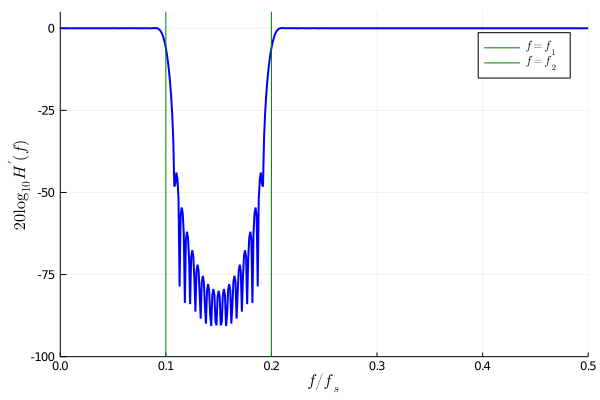

In [8]:
P = PolynomialRatio(b, [1]);
f_norm = 0:.001:.5;
H = freqz(P, f_norm*2*pi);
plot(f_norm, 20*log10.(abs.(H)), label=false, lw=2, linecolor = :blue)
vline!([f_1_norm], label = L"f = f_1", linecolor = :green)
vline!([f_2_norm], label = L"f = f_2", linecolor = :green)
xlims!((0,.5))
ylims!((-100,5))
xlabel!(L"f/f_s")
ylabel!(L"20 \log_{10}H^\prime(f)")